In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('daily-total-female-births.csv')

In [3]:
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [5]:
df['Date'] = pd.date_range(start='1/1/1959', periods=len(df), freq='D')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   Births  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [7]:
df.set_index('Date', inplace=True)

In [8]:
df.head(10)

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
1959-01-06,29
1959-01-07,45
1959-01-08,43
1959-01-09,38


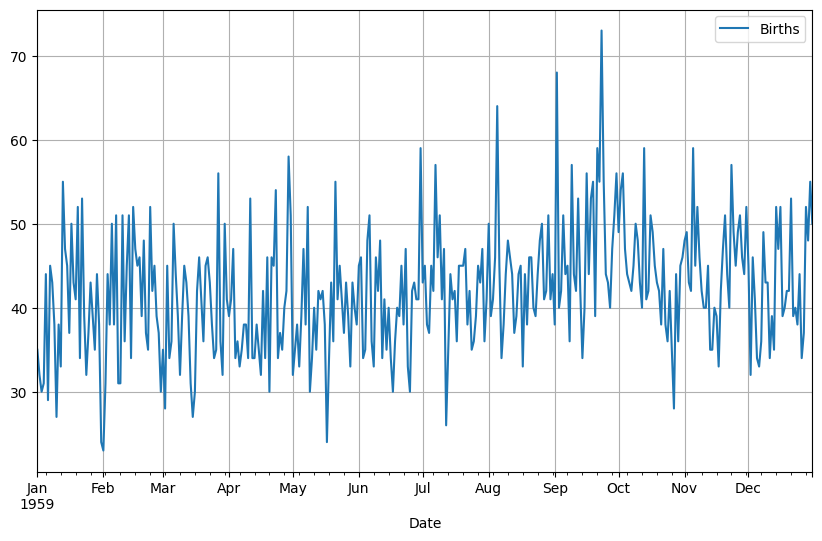

In [9]:
df.plot(figsize=(10,6), grid=True)
plt.show()

Let's split the dataset. Unlike using train_test_split to generate datasets of random entries, most recent data is considered for testing becasue that is forecasting. 

In [10]:
train = df.iloc[0:int(len(df)*0.7)]       # First 70% of data
test = df.iloc[int(len(df)*0.7):]         # Remaining 30% recent data

In [11]:
print(train.shape)
print(test.shape)

(255, 1)
(110, 1)


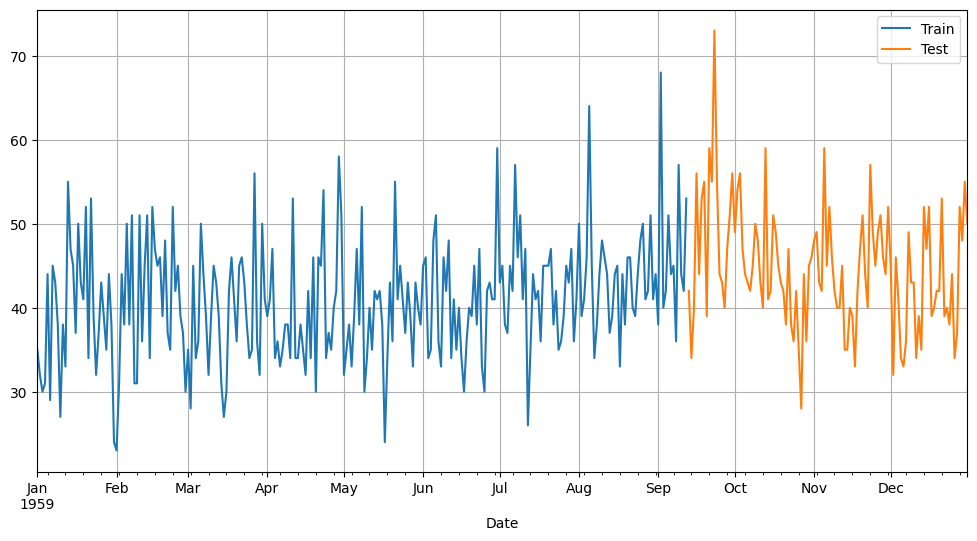

In [12]:
plt.figure(figsize=(12,6))
train['Births'].plot()
test['Births'].plot()
plt.legend(['Train','Test'])
plt.grid()
plt.show()

1. Linear Regression.

Let's do a simple Linear Regression with target variable 'Birth' and independent variable as increasing consecutive integers.

In [13]:
df.shape

(365, 1)

In [14]:
X_train = list(range(1,len(train)+1))
X_test = list(range(len(train)+1,len(train)+len(test)+1))

In [15]:
print(X_train)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [16]:
X_train = pd.DataFrame({'X': X_train})

In [17]:
print(X_test)

[256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365]


In [18]:
X_test = pd.DataFrame({'X' : X_test})

In [19]:
train_dummy = train.copy()
test_dummy = test.copy()

In [20]:
y_train = train_dummy['Births'].copy()
y_test = test_dummy['Births'].copy()

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
test_dummy['Predictions'] = y_pred 

In [24]:
test_dummy

,Births,Predictions
Date,,
1959-09-13,42,43.453482
1959-09-14,34,43.474181
1959-09-15,40,43.494881
1959-09-16,56,43.515581
1959-09-17,44,43.536280
...,...,...
1959-12-27,37,45.626949
1959-12-28,52,45.647648
1959-12-29,48,45.668348


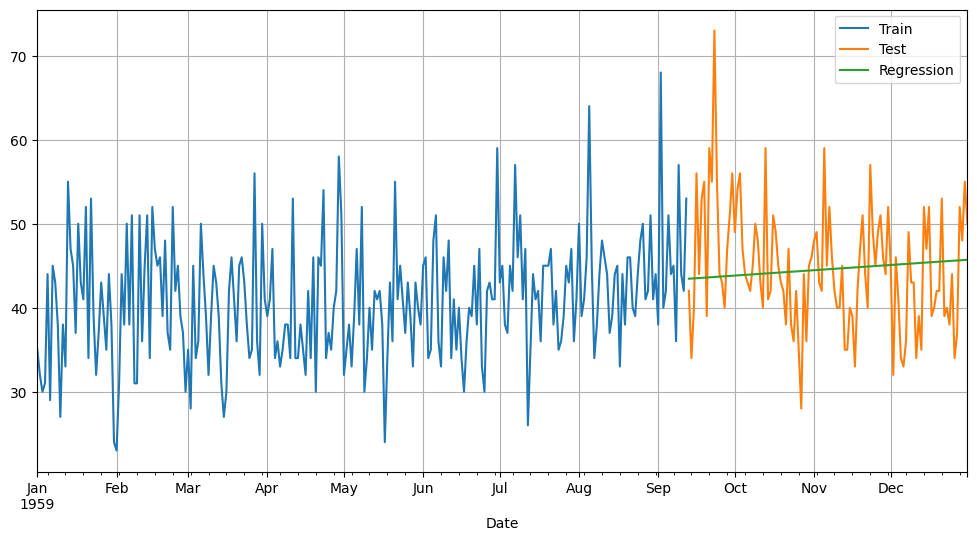

In [25]:
plt.figure(figsize=(12,6))
train_dummy['Births'].plot()
test_dummy['Births'].plot()
test_dummy['Predictions'].plot()
plt.legend(['Train','Test','Regression'], loc='best')
plt.grid()
plt.show()

Model Score

In [26]:
from sklearn import metrics
rmse = metrics.mean_squared_error(y_test,y_pred,squared=False)
rmse

7.391597058886001

2. Naive Method

In [27]:
naive_train = train.copy()
naive_test = test.copy()

In [28]:
naive_train.tail()

,Births
Date,
1959-09-08,36
1959-09-09,57
1959-09-10,44
1959-09-11,42
1959-09-12,53


In [29]:
naive_test['Predictions'] = np.full((len(naive_test),1), df.iloc[len(naive_train)-1][0]) 

C:\Users\HP\AppData\Local\Temp\ipykernel_18596\4034889156.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  naive_test['Predictions'] = np.full((len(naive_test),1), df.iloc[len(naive_train)-1][0])


In [30]:
naive_test

,Births,Predictions
Date,,
1959-09-13,42,53
1959-09-14,34,53
1959-09-15,40,53
1959-09-16,56,53
1959-09-17,44,53
...,...,...
1959-12-27,37,53
1959-12-28,52,53
1959-12-29,48,53


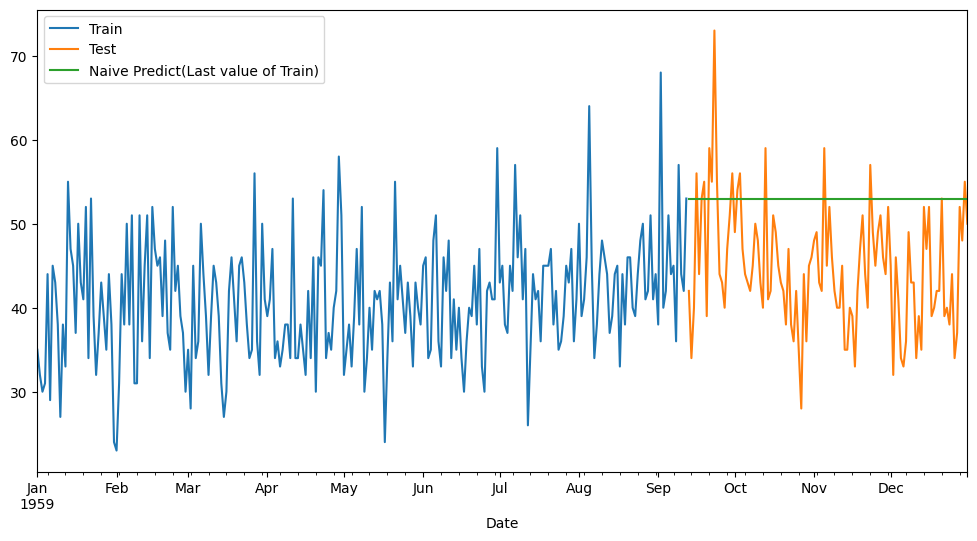

In [31]:
plt.figure(figsize=(12,6))
naive_train['Births'].plot()
naive_test['Births'].plot()
naive_test['Predictions'].plot()

plt.legend(['Train','Test','Naive Predict(Last value of Train)'], loc='best')
plt.show()

Model Score

In [32]:
error = metrics.mean_squared_error(naive_test['Births'], naive_test['Predictions'], squared=False)
error

10.9842862970038

3. Simple Average

In [33]:
avg_train = train.copy()
avg_test = test.copy()

In [34]:
avg_train['Births'].mean()

40.80392156862745

In [35]:
avg_test['Predictions'] = np.full((len(avg_test),1), avg_train['Births'].mean())

In [36]:
avg_test

,Births,Predictions
Date,,
1959-09-13,42,40.803922
1959-09-14,34,40.803922
1959-09-15,40,40.803922
1959-09-16,56,40.803922
1959-09-17,44,40.803922
...,...,...
1959-12-27,37,40.803922
1959-12-28,52,40.803922
1959-12-29,48,40.803922


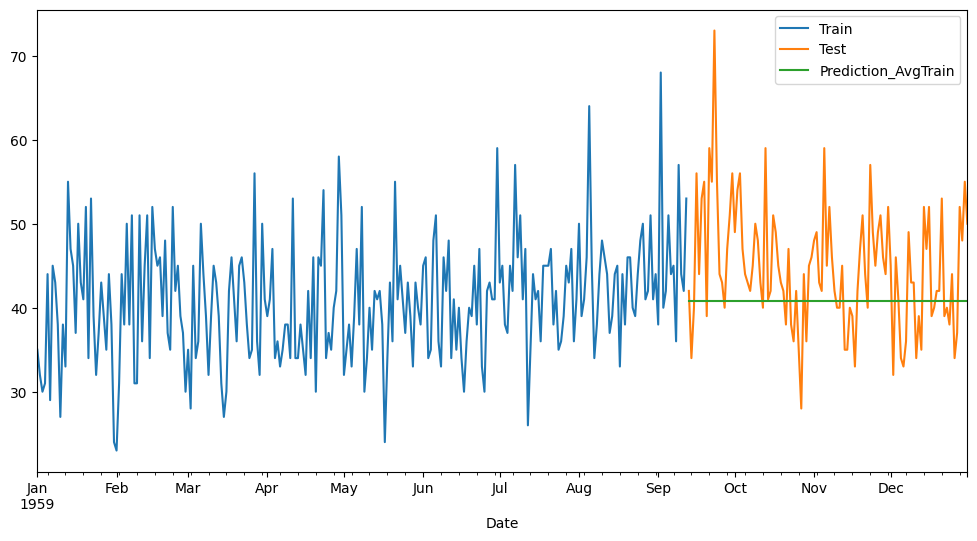

In [37]:
plt.figure(figsize=(12,6))
avg_train['Births'].plot()
avg_test['Births'].plot()
avg_test['Predictions'].plot()
plt.legend(['Train','Test','Prediction_AvgTrain'], loc='best')
plt.show()

Model Score

In [38]:
avg_error = metrics.mean_squared_error(avg_test['Births'],avg_test['Predictions'],squared=False)
avg_error

8.195469448330721

4. Moving Average (MA)

In [39]:
MA_df = df.copy()

In [40]:
MA_df.head(10)

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
1959-01-06,29
1959-01-07,45
1959-01-08,43
1959-01-09,38


Rolling is used to smooth out the immediate fluctuations.

In [41]:
MA_df['Trailing_2'] = MA_df['Births'].rolling(2).mean()  # Average of the datapoint and the point immediately before the datapoint.
MA_df['Trailing_4'] = MA_df['Births'].rolling(4).mean()  # Average of the datapoint and the 3 points preceding it.
MA_df['Trailing_6'] = MA_df['Births'].rolling(6).mean()  # Average of the datapoint and the 5 points preceding it.
MA_df['Trailing_9'] = MA_df['Births'].rolling(9).mean()

In [42]:
MA_df

,Births,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Date,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN
1959-01-02,32,33.5,NaN,NaN,NaN
1959-01-03,30,31.0,NaN,NaN,NaN
1959-01-04,31,30.5,32.00,NaN,NaN
1959-01-05,44,37.5,34.25,NaN,NaN
...,...,...,...,...,...
1959-12-27,37,35.5,38.25,38.666667,41.000000
1959-12-28,52,44.5,41.75,40.833333,42.111111
1959-12-29,48,50.0,42.75,42.166667,42.777778


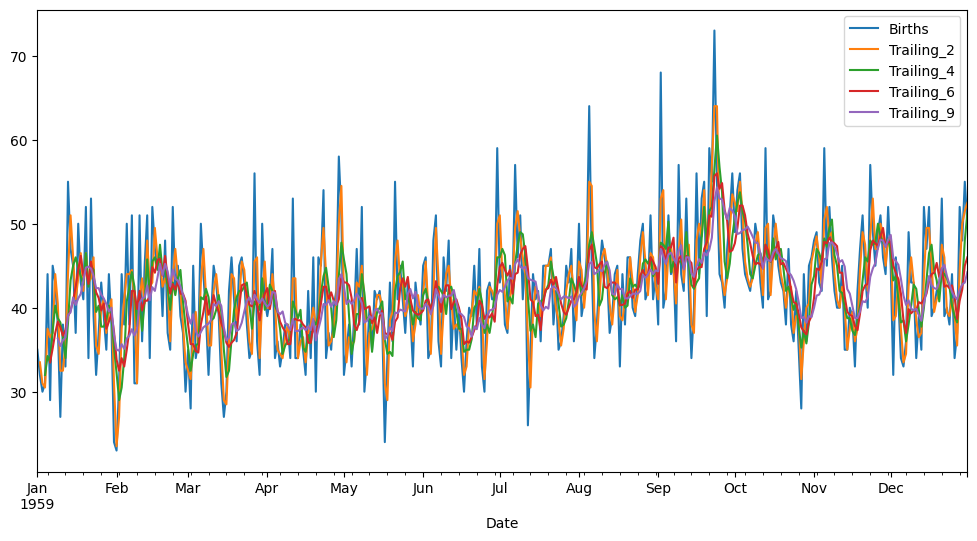

In [43]:
plt.figure(figsize=(12,6))
MA_df['Births'].plot()
MA_df['Trailing_2'].plot()
MA_df['Trailing_4'].plot()
MA_df['Trailing_6'].plot()
MA_df['Trailing_9'].plot()

plt.legend()
plt.show()

Let's split the dataset into train-test and see the score for different trailings.

In [44]:
MA_df.shape

(365, 5)

In [45]:
MA_Train = MA_df.iloc[0:int(len(MA_df)*0.7)]
MA_Test = MA_df.iloc[int(len(MA_df)*0.7):]

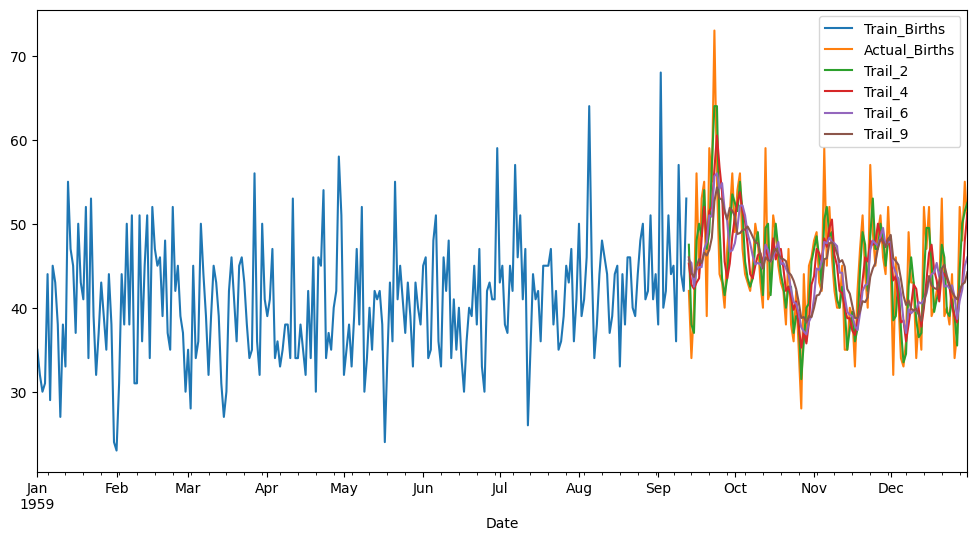

In [46]:
plt.figure(figsize=(12,6))
MA_Train['Births'].plot()
MA_Test['Births'].plot()
MA_Test['Trailing_2'].plot()
MA_Test['Trailing_4'].plot()
MA_Test['Trailing_6'].plot()
MA_Test['Trailing_9'].plot()

plt.legend(['Train_Births','Actual_Births','Trail_2','Trail_4','Trail_6','Trail_9'])
plt.show()

Model Evaluation.

In [47]:
error_trail2 = metrics.mean_squared_error(MA_Test['Births'], MA_Test['Trailing_2'], squared=False)
error_trail2

4.157960601501217

In [48]:
error_trail4 = metrics.mean_squared_error(MA_Test['Births'], MA_Test['Trailing_4'], squared=False)
error_trail4

5.531469885203126

In [49]:
error_trail6 = metrics.mean_squared_error(MA_Test['Births'], MA_Test['Trailing_6'], squared=False)
error_trail6

6.109315622370264

In [50]:
error_trail9 = metrics.mean_squared_error(MA_Test['Births'], MA_Test['Trailing_9'], squared=False)
error_trail9

6.502145031543309

Different Models and their RMSE's

In [51]:
pd.DataFrame({'Models':['Regression on Time','Naive Method','Simple Average','2pointTrailingMA','4pointTrailingMA','6pointTrailingMA','9pointTrailingMA'], 
'RMSE':[rmse,error,avg_error,error_trail2,error_trail4,error_trail6,error_trail9]}).set_index('Models')

,RMSE
Models,
Regression on Time,7.391597
Naive Method,10.984286
Simple Average,8.195469
2pointTrailingMA,4.157961
4pointTrailingMA,5.531470
6pointTrailingMA,6.109316
9pointTrailingMA,6.502145


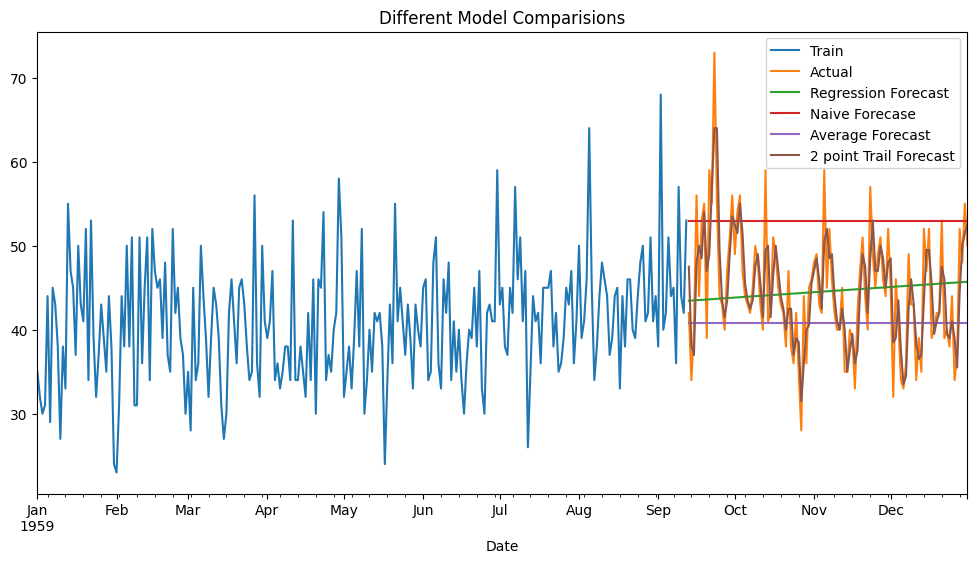

In [52]:
plt.figure(figsize=(12,6))
train['Births'].plot()
test['Births'].plot()
test_dummy['Predictions'].plot()
naive_test['Predictions'].plot()
avg_test['Predictions'].plot()
MA_Test['Trailing_2'].plot()

plt.title('Different Model Comparisions')
plt.legend(['Train','Actual','Regression Forecast','Naive Forecase','Average Forecast','2 point Trail Forecast'], loc='best')
plt.show()